# Project 4

Preprocessing

In [ ]:
#increase font size in the output
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '20px'
      break
    }
  }
  '''))
increase_font()
print("OM SRI SAI RAM")
get_ipython().events.register('pre_run_cell', increase_font)

<IPython.core.display.Javascript object>

OM SRI SAI RAM


 Importing the required packages and the data for classification

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'],
 columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']

<IPython.core.display.Javascript object>

In [ ]:
df.head()

<IPython.core.display.Javascript object>

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.isnull().sum()

<IPython.core.display.Javascript object>

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
y                          0
dtype: int64

#SETTING TARGETS AND FEATURES

In [ ]:
#split dataset in features and target variable
feature_cols = df.columns
feature_cols = feature_cols.drop('y')
X = df.iloc[:,:-1] # Features
y = df.iloc[:,-1] # Target variable

<IPython.core.display.Javascript object>

#SPLITTING DATA

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

<IPython.core.display.Javascript object>

#DECISION TREE

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

<IPython.core.display.Javascript object>

In [ ]:
y_train_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

<IPython.core.display.Javascript object>

Accuracy: 1.0


In [ ]:
rf_tuned_parameters =  {"criterion": ["gini", "entropy"], "max_depth": [10, 20, 50, 100], 'min_samples_leaf':[10, 20, 50]}

<IPython.core.display.Javascript object>

In [ ]:
cv_grid = GridSearchCV(clf, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(X_train, y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.963 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.972 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.997 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.974 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.981 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.981 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.984 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.998 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.986 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.9

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50]},
             scoring='roc_auc', verbose=5)

In [ ]:
cv_grid.best_params_

<IPython.core.display.Javascript object>

{'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 10}

In [ ]:
y_pred_cv=cv_grid.predict(X_test)
print(recall_score(y_test, y_pred_cv))     
print(precision_score(y_test, y_pred_cv))  
print(roc_auc_score(y_test, y_pred_cv))    
print("\n confusion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred_cv)))


<IPython.core.display.Javascript object>

0.9166666666666666
0.8761061946902655
0.8472222222222222

 confusion matrix on validation data: 
[[49 14]
 [ 9 99]]


#EVALUATING MODEL

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

<IPython.core.display.Javascript object>

Accuracy: 0.9298245614035088


#VISUALIZING THE MODEL

<IPython.core.display.Javascript object>

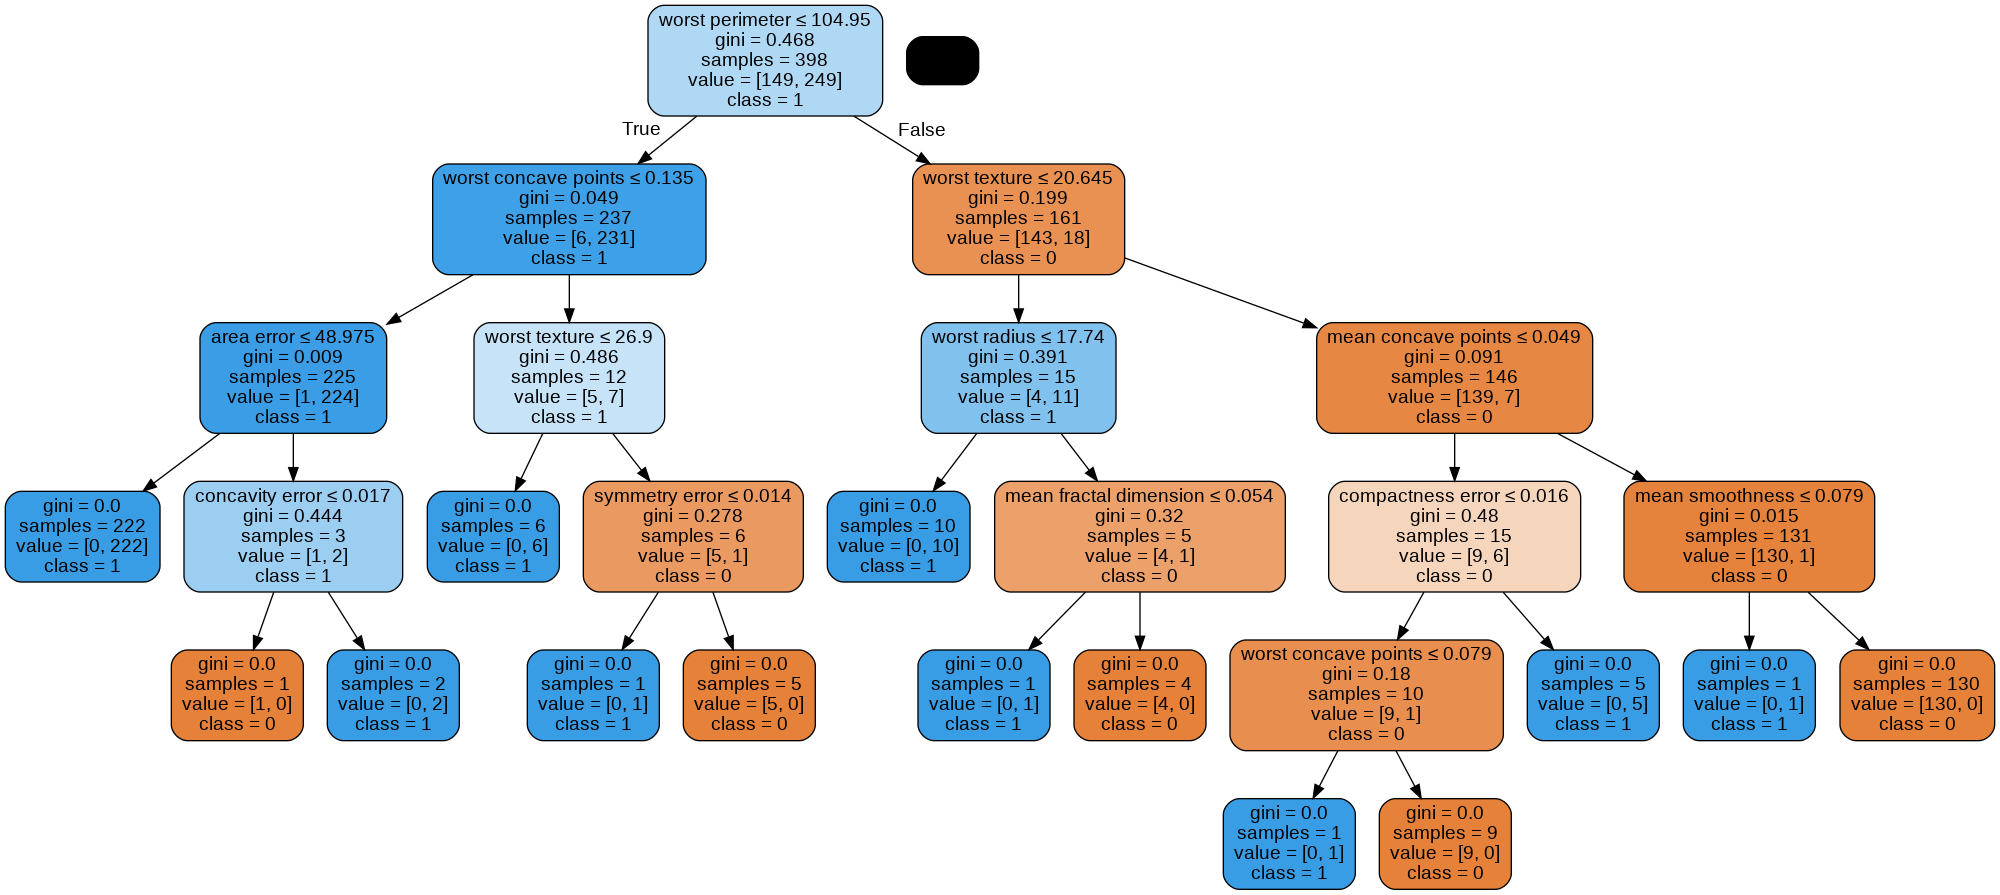

In [ ]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from io import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Breast_cancer_decision_tree.png')
Image(graph.create_png())

#RANDOM FOREST

In [ ]:
estimator = RandomForestClassifier(random_state=0, warm_start = True)
estimator.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(random_state=0, warm_start=True)

In [ ]:
y_pred_rf = estimator.predict(X_test)
print(recall_score(y_test,y_pred_rf))     
print(precision_score(y_test, y_pred_rf))  
print(roc_auc_score(y_test, y_pred_rf))    
print("\n confusion matrix on validation data: \n" + str(confusion_matrix(y_test,y_pred_rf)))


<IPython.core.display.Javascript object>

0.9629629629629629
0.9454545454545454
0.9338624338624338

 confusion matrix on validation data: 
[[ 57   6]
 [  4 104]]


#USING CV_GRID

In [ ]:
rf_tuned_parameters =  {"criterion": ["gini", "entropy"], "max_depth": [10, 20, 50, 100], 'min_samples_leaf':[10, 20, 50]}

<IPython.core.display.Javascript object>

In [ ]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(X_train, y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.988 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.985 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=1.000 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.994 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.990 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.987 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.985 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=1.000 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.994 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.9

GridSearchCV(estimator=RandomForestClassifier(random_state=0, warm_start=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50]},
             scoring='roc_auc', verbose=5)

In [ ]:
cv_grid.best_params_

<IPython.core.display.Javascript object>

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}

In [ ]:
y_pred_cv=cv_grid.predict(X_test)
print(recall_score(y_test, y_pred_cv))     
print(precision_score(y_test, y_pred_cv))  
print(roc_auc_score(y_test, y_pred_cv))    
print("\n confusion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred_cv)))


<IPython.core.display.Javascript object>

0.9444444444444444
0.9357798165137615
0.9166666666666666

 confusion matrix on validation data: 
[[ 56   7]
 [  6 102]]


#GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)
y_pred_gb=gradient_booster.predict(X_test)

<IPython.core.display.Javascript object>

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

<IPython.core.display.Javascript object>

In [ ]:
pred = [y_pred_dt,y_pred_rf,y_pred_cv,y_pred_gb,y_pred_knn]
names = ['dt','rf','cv','gb','knn']

<IPython.core.display.Javascript object>

In [ ]:
def plot_curve(y_test, y_pred,name):
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    results = confusion_matrix(y_test, y_pred)

    print ('Confusion Matrix of '+name +' is: \n', results)
    print ('Accuracy Score of '+name +'is %.4f' % (accuracy_score(y_test, y_pred)))
    print ('Classification Report of '+name +' is: \n', classification_report(y_test, y_pred))
    print('AUC-ROC of'+name +' is:',roc_auc_score(y_test, y_pred))
    print('LOGLOSS Value of'+name +' is %.4f' % log_loss(y_test, y_pred))
    plt.title('Receiver Operating Characteristic of '+name )
    plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print("//////////////////////////////////////////////////////////////////")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix of dt is: 
 [[ 53  10]
 [  2 106]]
Accuracy Score of dtis 0.9298
Classification Report of dt is: 
               precision    recall  f1-score   support

           0       0.96      0.84      0.90        63
           1       0.91      0.98      0.95       108

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171

AUC-ROC ofdt is: 0.9113756613756613
LOGLOSS Value ofdt is 2.4238


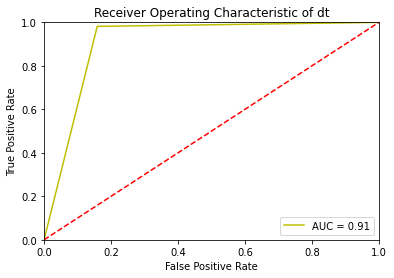

//////////////////////////////////////////////////////////////////
Confusion Matrix of rf is: 
 [[ 57   6]
 [  4 104]]
Accuracy Score of rfis 0.9415
Classification Report of rf is: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

AUC-ROC ofrf is: 0.9338624338624338
LOGLOSS Value ofrf is 2.0198


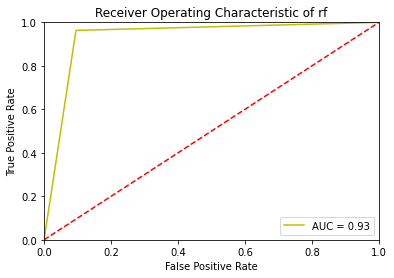

//////////////////////////////////////////////////////////////////
Confusion Matrix of cv is: 
 [[ 56   7]
 [  6 102]]
Accuracy Score of cvis 0.9240
Classification Report of cv is: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

AUC-ROC ofcv is: 0.9166666666666666
LOGLOSS Value ofcv is 2.6258


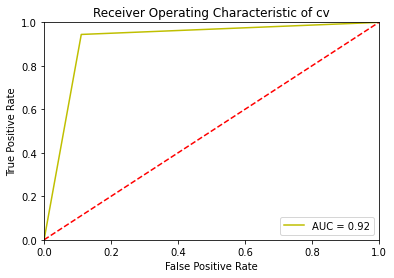

//////////////////////////////////////////////////////////////////
Confusion Matrix of gb is: 
 [[ 58   5]
 [  1 107]]
Accuracy Score of gbis 0.9649
Classification Report of gb is: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

AUC-ROC ofgb is: 0.9556878306878308
LOGLOSS Value ofgb is 1.2119


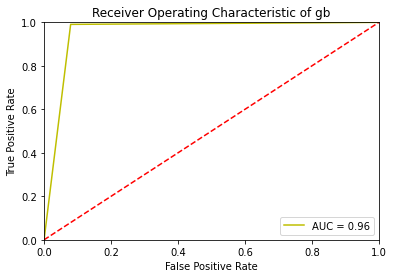

//////////////////////////////////////////////////////////////////
Confusion Matrix of knn is: 
 [[ 57   6]
 [  5 103]]
Accuracy Score of knnis 0.9357
Classification Report of knn is: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

AUC-ROC ofknn is: 0.9292328042328043
LOGLOSS Value ofknn is 2.2218


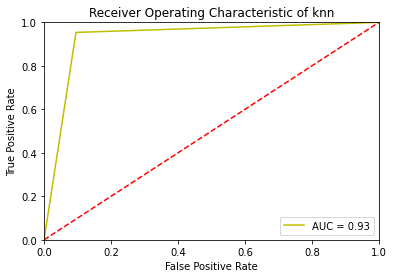

//////////////////////////////////////////////////////////////////


In [ ]:
for i in range(len(pred)):
  plot_curve(y_test, pred[i],names[i])

In [ ]:
def plotting_roc_auc_curve(y_test,y_pred,name):  
    fpr = [0]*5
    tpr=[0]*5
    roc_auc = [0]*5
    thresholds = [0]*5
    for i in range(len(y_pred)):
    
      fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_pred[i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      results = confusion_matrix(y_test, y_pred[i])
      # print (f'Confusion Matrix of {name[i]} is: \n', results)
      # print (f'Accuracy Score of {name[i]} is %.4f' % (accuracy_score(y_test, y_pred[i])))
      # print (f'Classification Report of {name[i]} is: \n', classification_report(y_test, y_pred[i]))
      # print(f'AUC-ROC of {name[i]} is:',roc_auc_score(y_test, y_pred[i]))
      # print(f'LOGLOSS Value of {name[i]} is %.4f' % log_loss(y_test, y_pred[i]))
    
    plt.figure(figsize=(10,10)) 
    plt.title('Receiver Operating Characteristic')
    colors = ['y','g','b','k','c']
    labels = ['dt','rf','cv','gb','knn']
    for i in range(len(y_pred)):
      plt.plot(fpr[i], tpr[i], color = colors[i], label = labels[i] )
    plt.legend()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

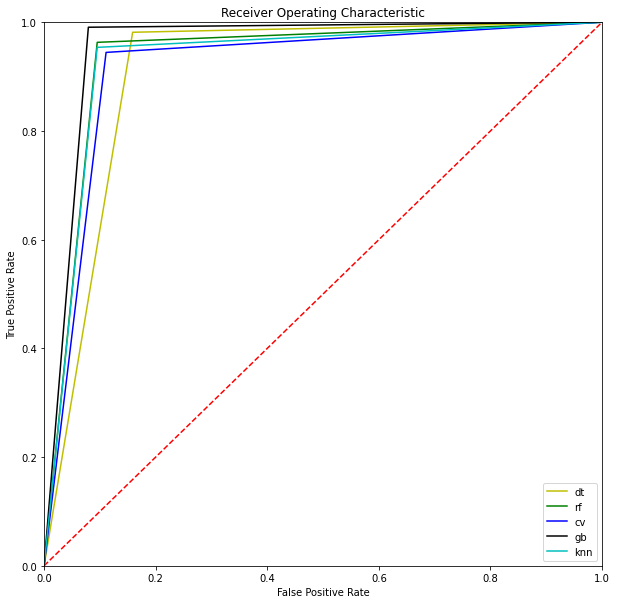

In [ ]:
plotting_roc_auc_curve(y_test,pred,names)

In [ ]:
#so best model is with grdient boosting

<IPython.core.display.Javascript object>